In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### 1.Problem_Statement

#### 2.Data_Reading

In [2]:
df = pd.read_csv("Live.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


#### 3.Exploratory_Data_Analysis

In [3]:
df.shape

(7050, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.Feature_Engineering

#### Dropping redundant columns

In [7]:
df.drop(["Column1","Column2","Column3","Column4"],axis = 1,inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [9]:
df["status_id"].nunique()

6997

In [10]:
df["status_published"].nunique()

6913

In [11]:
df["status_type"].nunique()

4

In [12]:
df["status_type"].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

#### Dropping status_id and status_published features

In [13]:
df.drop(["status_id","status_published"],axis = 1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [15]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


#### encoding on status_type feature

In [16]:
df["status_type"].replace({'video':0 ,'photo':1, 'link':2, 'status':3},inplace=True)

In [17]:
status_type_data = {'video':0 ,'photo':1, 'link':2, 'status':3}

In [18]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


#### declaring feature vector and target variables

In [19]:
x = df
y = df["status_type"]

In [20]:
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [21]:
y

0       0
1       1
2       0
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int64

#### feature_scaling

In [22]:
scaler = StandardScaler()
scaler

StandardScaler()

In [23]:
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.1058511 ,  0.64610394,  0.32335035, ...,  0.07671305,
         0.47357035, -0.15574803],
       [ 0.30933319, -0.17319166, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-1.1058511 , -0.00673846,  0.01308938, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [ 0.30933319, -0.49312768, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.30933319,  0.26131603, -0.23871662, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.30933319, -0.46070173, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [24]:
df1 = pd.DataFrame(df_scaled,columns = df.columns)
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,-1.105851,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,0.309333,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-1.105851,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,0.309333,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,0.309333,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...,...
7045,0.309333,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,0.309333,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,0.309333,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,0.309333,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


In [25]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,7050.0,-3.225159e-17,1.000071,-1.105851,-1.105851,0.309333,0.309333,3.139702
num_reactions,7050.0,0.000000e+00,1.000071,-0.497451,-0.460702,-0.368828,-0.024032,9.684296
num_comments,7050.0,0.000000e+00,1.000071,-0.252206,-0.252206,-0.247710,-0.226351,23.343365
num_shares,7050.0,0.000000e+00,1.000071,-0.304144,-0.304144,-0.304144,-0.273747,25.715945
num_likes,7050.0,1.612579e-17,1.000071,-0.478469,-0.440644,-0.349419,-0.067402,10.001228
num_loves,7050.0,0.000000e+00,1.000071,-0.318454,-0.318454,-0.318454,-0.243398,16.118835
num_wows,7050.0,8.062896e-18,1.000071,-0.147879,-0.147879,-0.147879,-0.147879,31.736395
num_hahas,7050.0,-1.612579e-17,1.000071,-0.176010,-0.176010,-0.176010,-0.176010,39.501488
num_sads,7050.0,-8.062896e-18,1.000071,-0.152587,-0.152587,-0.152587,-0.152587,31.781438
num_angrys,7050.0,1.612579e-17,1.000071,-0.155748,-0.155748,-0.155748,-0.155748,42.499304


#### 5.Feature_Selection

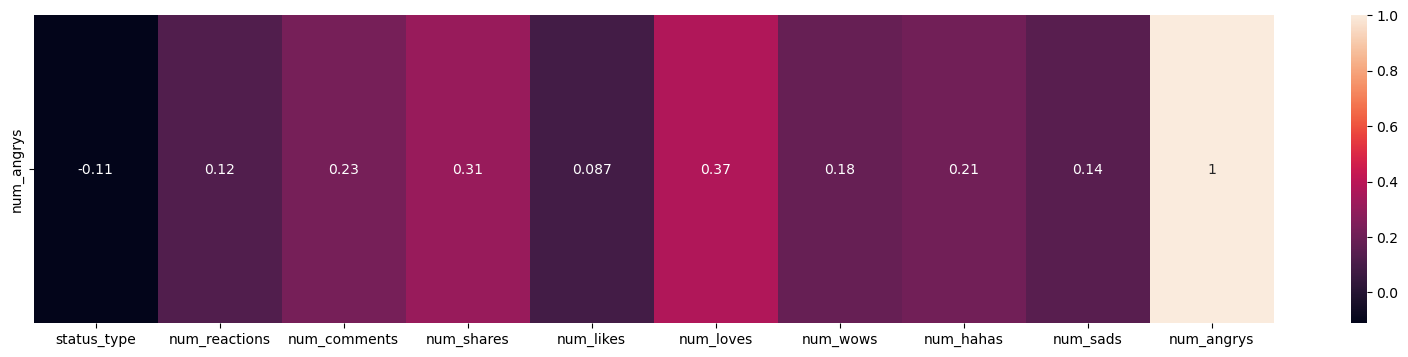

In [26]:
plt.figure(figsize=(20,4))
sns.heatmap(df1.corr().tail(1),annot=True)
plt.savefig("feature_correlation")

#### 6.Model_Training

In [27]:
km = KMeans(n_clusters=2,random_state=20)
km

KMeans(n_clusters=2, random_state=20)

In [28]:
km.fit(x)

KMeans(n_clusters=2, random_state=20)

#### 7.Parameters_Study

In [29]:
km.cluster_centers_

array([[7.97221016e-01, 2.24142278e+02, 1.22109857e+02, 3.08061948e+01,
        2.11227529e+02, 1.09083804e+01, 1.15298886e+00, 5.56809958e-01,
        1.97423650e-01, 9.63960052e-02],
       [7.09219858e-03, 5.22886525e+02, 5.23441844e+03, 4.91624113e+02,
        4.02007092e+02, 1.01921986e+02, 7.97163121e+00, 7.53900709e+00,
        2.51063830e+00, 9.36170213e-01]])

In [30]:
km.inertia_

4986395285.530468

#### 8.Quality of Classification

In [31]:
labels = km.labels_
correct_labels = sum(y == labels)
correct_labels

2195

In [32]:
labels = km.labels_
correct_labels = sum(y == labels)/y.size*100
correct_labels

31.134751773049647

In [33]:
labels = km.labels_
correct_labels = sum(y == labels)
print("Result : %d out of %d samples were correctly labelled."%(correct_labels,y.size))
print("Accuracy_Score :{0:0.2f}".format(correct_labels/y.size))

Result : 2195 out of 7050 samples were correctly labelled.
Accuracy_Score :0.31


#### 9.Elbow_Method to find optimal number of clusters

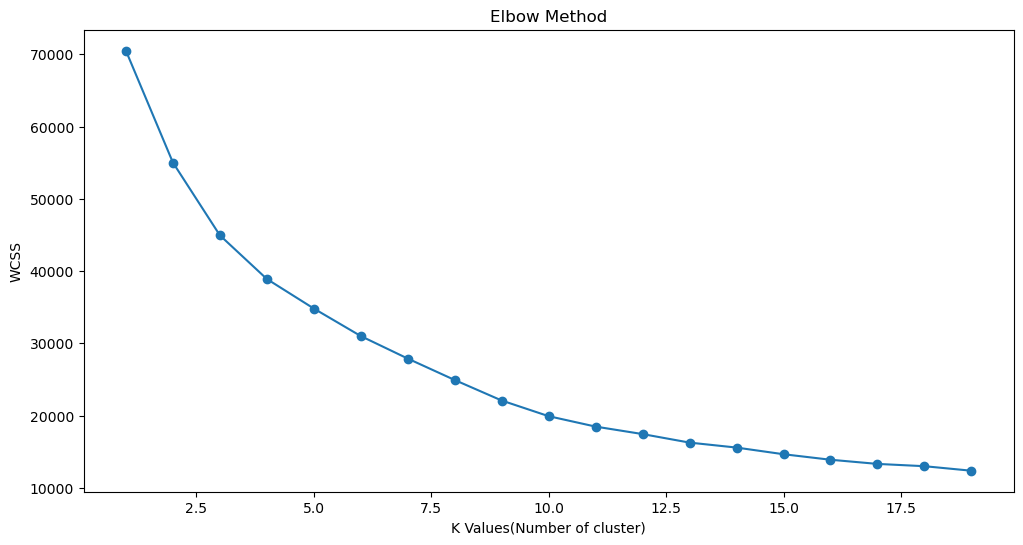

In [34]:
wcss = []
for k in range(1,20):
    km = KMeans(n_clusters=k,random_state=20)
    km.fit(df1)
    wcss.append(km.inertia_)
frame = pd.DataFrame({'k':range(1,20),"wcss":wcss})
plt.figure(figsize=(12,6))
plt.plot(frame["k"],frame["wcss"],marker = "o")
plt.xlabel("K Values(Number of cluster)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.savefig("elbow_method")

In [35]:
km = KMeans(n_clusters=8,random_state=20)
km.fit(df1)

KMeans(random_state=20)

In [36]:
pred = km.predict(df1)
len(pred)

7050

In [37]:
labels = km.labels_
correct_labels = sum(y == labels)
print("Result : %d out of %d samples were correctly labelled."%(correct_labels,y.size))
print("Accuracy_Score :{0:0.2f}".format(correct_labels/y.size))

Result : 4045 out of 7050 samples were correctly labelled.
Accuracy_Score :0.57


In [38]:
frame = pd.DataFrame(df1)
frame["K"]= pred
frame["K"].value_counts()

1    5386
3     764
0     375
6     332
2     146
5      23
4      17
7       7
Name: K, dtype: int64